# 📊 Phoenix KE Mentorship Program - Data Science Tier 2 Case Study: Diabetes Risk Prediction
### Author: Rose Kimondo
### Date: April 22, 2025


# Introduction

This case study is part of the Phoenix KE Mentorship Program application for the Data Science track.
We aim to develop a predictive model to assess whether an individual is at risk of developing diabetes.
The dataset contains various health and lifestyle features. We will use machine learning classification models to predict diabetes risk.


# Problem Statement
A health tech startup wants to build a predictive system that can identify individuals at risk of diabetes. The goal is to use patient data to flag high-risk individuals early, enabling early intervention.

# Business Relevance
Diabetes is a growing global concern, contributing significantly to healthcare costs. By predicting who is at risk, the startup can:
- Help clinicians target early interventions
- Improve patient outcomes
- Reduce long-term treatment costs
- Build a foundation for personalized health recommendations



# Objectives
1. Explore and understand the dataset
2. Engineer new features to enhance predictive power
3. Train classification models to predict diabetes risk
4. Evaluate and compare model performance
5. Interpret key predictors for stakeholder insights

# Data Understanding
The dataset contains the following columns:
- Age: Age of the patient (in years)
- BMI: Body Mass Index
- Blood Pressure: Average blood pressure reading
- Glucose Level: Fasting blood glucose
- Insulin Level: Fasting insulin level
- Physical Activity Score: Categorical score from 1 (low activity) to 9 (high activity)
- Diabetes: Target variable (Yes/No)

# Data Import and Exploration

In [56]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [57]:
# Load dataset
df = pd.read_csv('diabetes_data.csv')
# Viewing the first five columns
df.head()

,Age,BMI,Blood Pressure,Glucose Level,Insulin Level,Physical Activity Score,Diabetes
0,38,17.6,71.4,111.4,131.3,5,No
1,37,25.5,91.3,97.2,116.1,9,No
2,43,19.0,77.3,90.0,121.4,4,No
3,21,30.9,72.2,88.0,122.8,1,No
4,63,32.3,87.3,135.0,71.5,4,No


# EDA

In [58]:
# Basic structure
df.info() # Displays data types and non-null counts

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      300 non-null    int64  
 1   BMI                      300 non-null    float64
 2   Blood Pressure           300 non-null    float64
 3   Glucose Level            300 non-null    float64
 4   Insulin Level            300 non-null    float64
 5   Physical Activity Score  300 non-null    int64  
 6   Diabetes                 300 non-null    object 
dtypes: float64(4), int64(2), object(1)
memory usage: 16.5+ KB


- There are seven columns in total, with 300 rows. 
- All the columns except Diabetes are numeric. 
- However, Physical Activity Score is of the numeric categorical data type, with each number representing a score of physical activity. 

In [59]:
df.describe() # Summary statistics for numeric columns

,Age,BMI,Blood Pressure,Glucose Level,Insulin Level,Physical Activity Score
count,300.000000,300.000000,300.000000,300.000000,300.00000,300.000000
mean,48.800000,26.959000,79.422333,109.900667,99.56200,5.043333
std,18.003901,5.140724,9.995066,19.533576,28.75657,2.441583
min,18.000000,14.900000,45.300000,56.300000,0.30000,1.000000
25%,34.000000,23.475000,72.775000,96.000000,79.65000,3.000000
50%,48.500000,26.900000,79.950000,110.250000,99.25000,5.000000
75%,64.000000,30.625000,86.475000,124.050000,120.55000,7.000000
max,79.000000,40.700000,106.300000,154.400000,191.90000,9.000000


- Some of the statistics that can be observed include the average age (48.8 years), Average Glucose level (99.56), and average blood pressure (79.42).
- However, there are some issues that stand out which could be errors or inconsistencies. For example, the minimum insulin level is 0.3 while the maximum is 191, and mean is 99.56. This minimum could be an error and will need to be assessed later. 

In [60]:
# Checking for missing values
missing = df.isnull().sum()
missing

Age                        0
BMI                        0
Blood Pressure             0
Glucose Level              0
Insulin Level              0
Physical Activity Score    0
Diabetes                   0
dtype: int64

From the check for missing values, there are no missing values in the dataset.

In [61]:
# Confirming that there are no missing values
missing_percent = (missing / len(df)) * 100
print(pd.DataFrame({'Missing Values': missing, 'Percent': missing_percent}))

                         Missing Values  Percent
Age                                   0      0.0
BMI                                   0      0.0
Blood Pressure                        0      0.0
Glucose Level                         0      0.0
Insulin Level                         0      0.0
Physical Activity Score               0      0.0
Diabetes                              0      0.0


Confirmed that there are no missing values. Using the percentage is a good way to figure out the impact that the missing values would have on the overall fields.

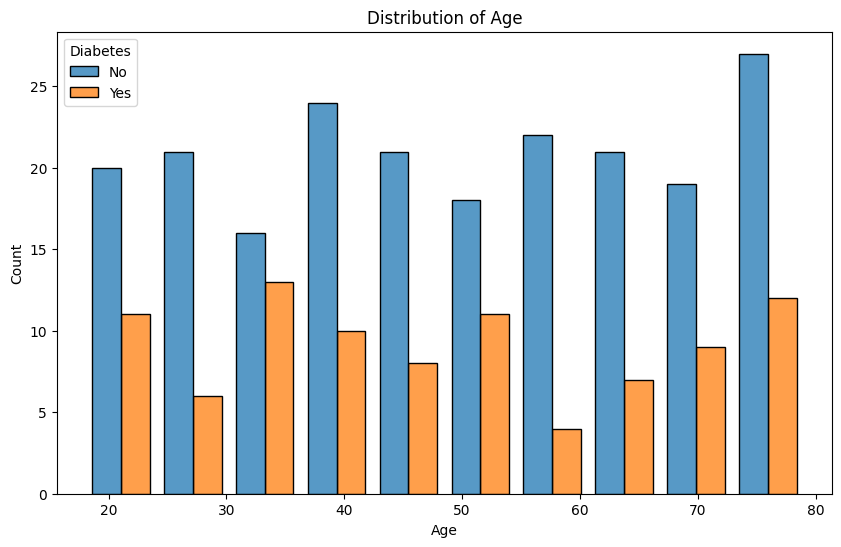

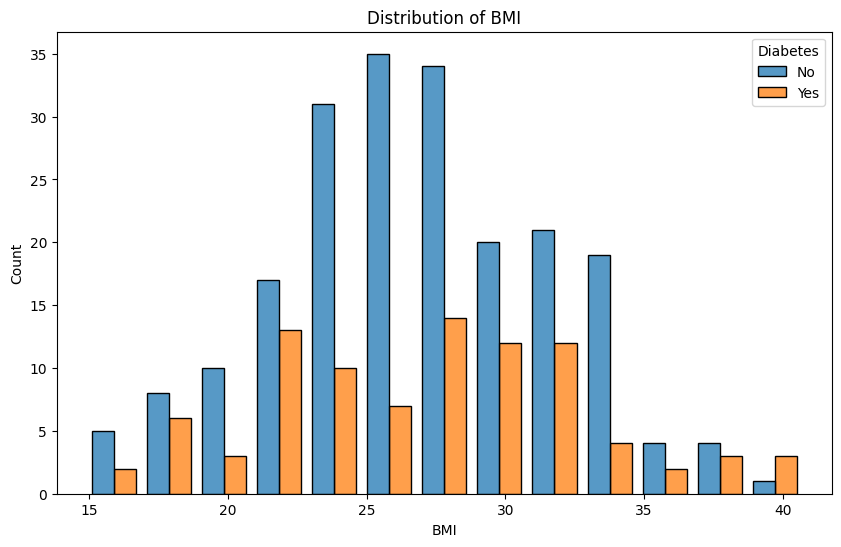

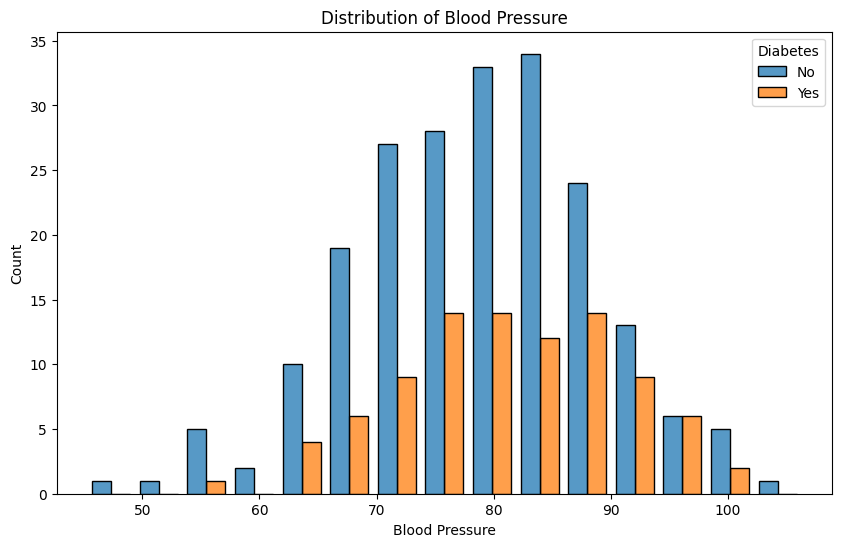

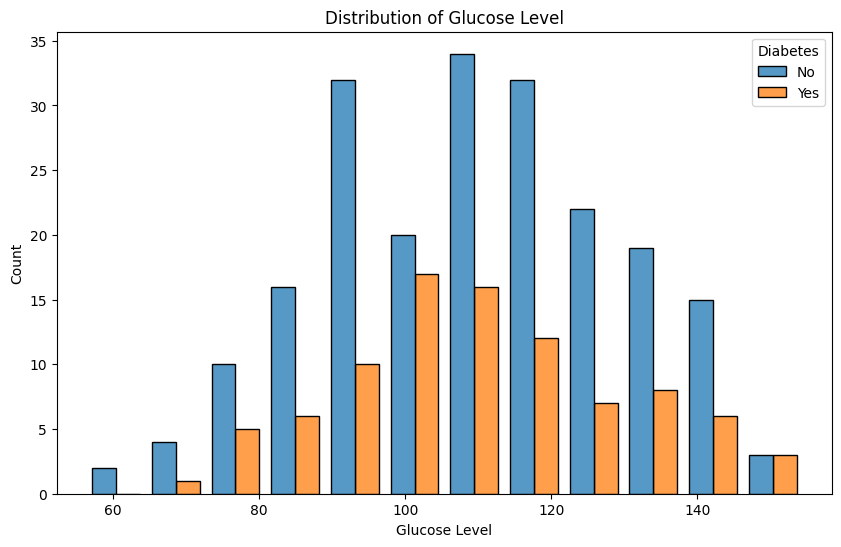

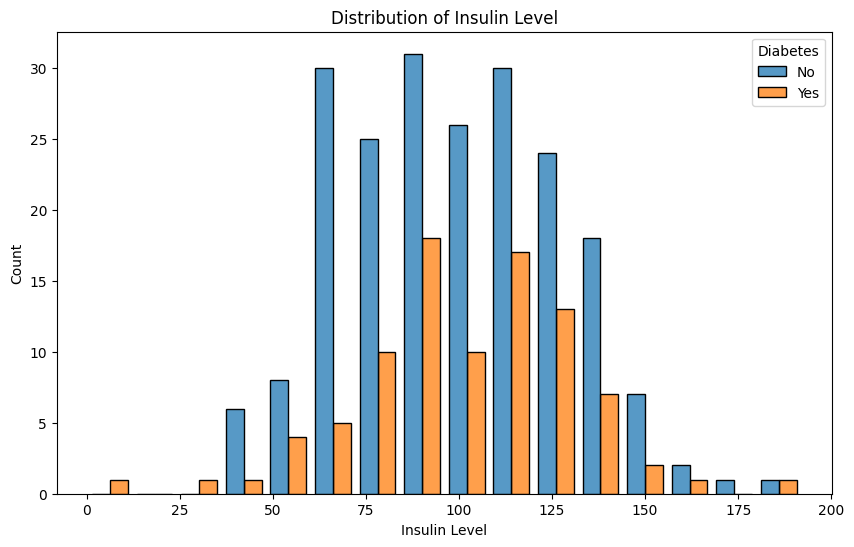

In [62]:
# Distribution plots for numerical features
for col in ['Age', 'BMI', 'Blood Pressure', 'Glucose Level', 'Insulin Level']:
    plt.figure(figsize=(10, 6))
    sns.histplot(data=df, x=col, hue='Diabetes', kde=False, multiple='dodge', shrink=0.8 )
    plt.title(f'Distribution of {col}')
    plt.show()

The plots show individuals with and without diabetes across all the numerical continuous features (`Age`, `BMI`, `Blood Pressure`, `Glucose Level`, `Insulin Level`)<br>
The histograms present the frequency distribution of the features and seperates individuals into those without diabetes ('No', blue bars) and those with diabetes ('Yes', orange bars), using side-by-side bars for comparison within each range (bin).<br>

**1. Age:** <br>
- By comparing the heights of the orange bars (Diabetes: Yes) to the blue bars (Diabetes: No) across the age spectrum, we can observe a trend. While the absolute count of non-diabetics is often higher, the count and proportion of diabetics (orange bars) appear to increase notably in the middle-aged and older groups compared to the younger groups<br>

**2. BMI:**<br>
- At lower BMIs (e.g., below ~22), the count of individuals with diabetes (orange) is relatively low compared to those without (blue).<br>
- As BMI increases, particularly from the mid-20s upwards, the number of individuals with diabetes (orange bars) becomes more significant, both in absolute count and often in proportion to the non-diabetics in the same BMI bin.<br>
- The tallest orange bars (highest frequency of diabetics) seem to occur in the BMI ranges from roughly 28 to 33, overlapping with but also extending higher than the peak range for non-diabetics.<br>

**3. Blood Pressure:**<br>
- Based solely on the histogram, blood pressure (as represented here) doesn't appear to be as strong a distinguishing factor between diabetics and non-diabetics as Age or BMI were in the previous plots. While individuals with diabetes might have other cardiovascular risk factors, this specific visualization of blood pressure distribution doesn't show a dramatic difference between the two groups in this dataset. The typical blood pressure ranges seem largely overlapping for both groups.<br>

**4. Glucose Level:**<br>
- There is a very noticeable difference and separation between the glucose level distributions of the two groups.<br>
    - Lower glucose levels (e.g., < 100) are much more characteristic of non-diabetic individuals.<br>
    - Higher glucose levels (e.g., > 110-120) are much more characteristic of individuals with diabetes.<br>
- The overlap range (around 90-115) shows individuals from both groups, but the balance clearly shifts from predominantly non-diabetic at the lower end to predominantly diabetic at the higher end of this range.<br>
- This visualization demonstrates that glucose level is a very strong indicator and differentiator for diabetes status in this dataset. Unlike blood pressure which showed similar distributions, glucose levels show a distinct separation, with higher levels being strongly associated with the presence of diabetes.<br>

**5. Insulin Level:**<br>
- The most striking feature is the higher variability in insulin levels among the diabetic group compared to the non-diabetic group.<br>
    - Non-diabetics are mostly clustered within what might be considered a normal physiological range.<br>
    - Diabetics, on the other hand, occupy a wider spectrum – some have very low levels, while many others have levels that are normal or elevated compared to the non-diabetic peak range.<br>
- Higher insulin levels (e.g., above 125 or 150) are more frequently observed in the diabetic group than the non-diabetic group in this sample.<br>
- This histogram suggests that insulin levels are more varied among individuals with diabetes in this dataset. Unlike non-diabetics who show a more typical, centered distribution, diabetics can present with either very low or relatively high insulin levels. This reflects the different pathophysiologies associated with diabetes (insulin deficiency vs. insulin resistance). High insulin levels appear more commonly associated with diabetes than non-diabetes in this visual.<br>


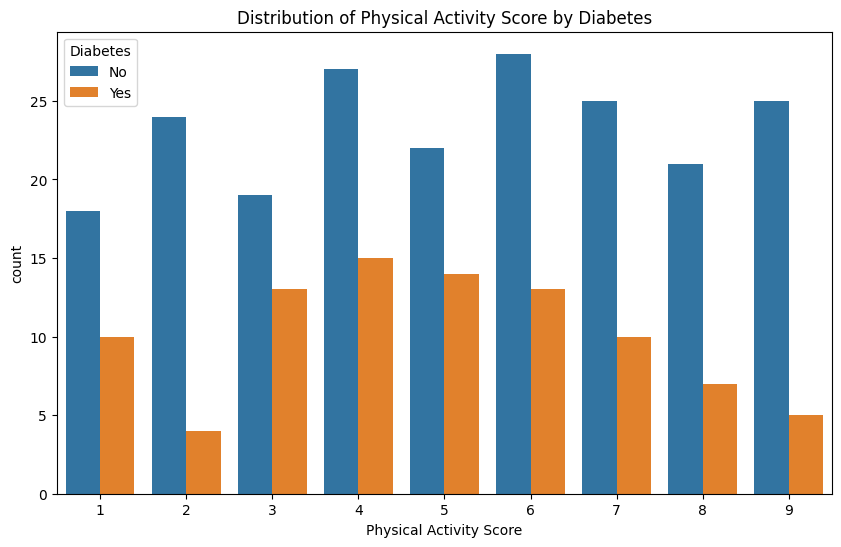

In [63]:
# Bar plot for Physical Activity Score
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Physical Activity Score', hue='Diabetes')
plt.title('Distribution of Physical Activity Score by Diabetes')
plt.show() # Shows frequency of activity scores split by diabetes

An visualization of the physical activity scores with the count within each score category based on the diabetes status ('No'(blue), 'Yes'(Orange)) shows that:<br>
- At lower physical activity scores (e.g., scores 1, 3, 4, 5, 6), the orange bars (diabetics) are relatively prominent. There are substantial numbers of individuals with diabetes reporting these lower-to-mid activity levels.<br>
- At higher physical activity scores (e.g., scores 7, 8, 9), the orange bars (diabetics) become noticeably smaller, especially relative to the blue bars. Fewer individuals with diabetes report the highest levels of physical activity.<br>
- This visualization suggests an inverse association between Physical Activity Score and diabetes in this dataset. Lower physical activity scores appear to be more common among individuals with diabetes, while higher physical activity scores are more characteristic of individuals without diabetes. This aligns with general health recommendations suggesting physical activity is beneficial in preventing or managing diabetes.<br>

## Checking for Class Imbalance in the Traget Variable

In [66]:
df['Diabetes'].value_counts(normalize=True)

Diabetes
No     0.696667
Yes    0.303333
Name: proportion, dtype: float64

There is a high level of imbalance, wuth the NO having 70% of the values and YES having 30% of the values. This imbalance will have to be dealt with to avoid overfitting. Let's visualize this imbalance below.

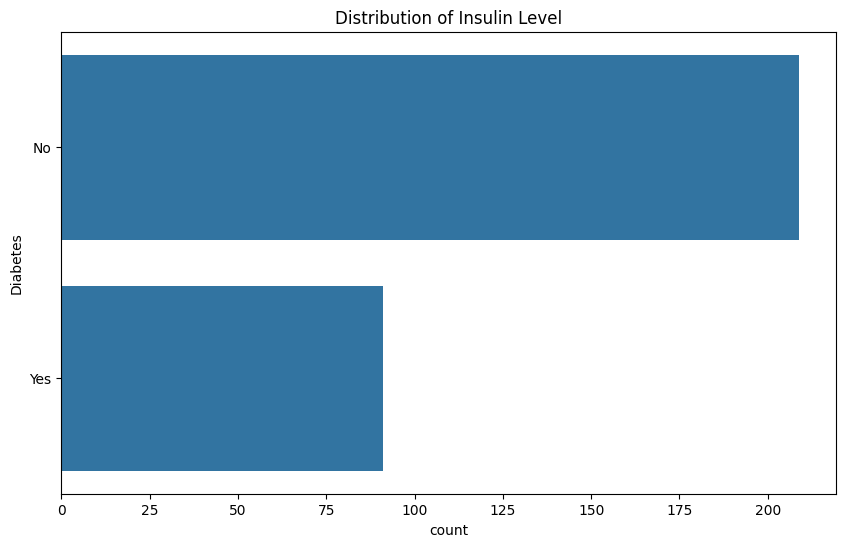

In [ ]:

plt.figure(figsize=(10, 6))
sns.countplot(df['Diabetes'] )
plt.title(f'Distribution of {col}')
plt.show()


# Feature Engineering

We create new features based on domain knowledge:
- BMI_Age_Ratio: Ratio of BMI to Age
- Insulin_Resistance_Index: Proxy for insulin resistance (Glucose * Insulin)

In [69]:
df['BMI_Age_Ratio'] = df['BMI'] / df['Age'] # Normalize BMI by age to capture age-adjusted weight
df['Insulin_Resistance_Index'] = df['Glucose Level'] * df['Insulin Level'] # Biological marker for insulin resistance

In [70]:
# Structural Overview, viewing the first five rows, and summary statistics for BMI_Age_Ratio
print("STRUCTURAL OVERVIEW:")
print(df['BMI_Age_Ratio'].info())
print()
print("FIRST FIVE rows:")
print(df['BMI_Age_Ratio'].head())
print()
print("SUMMARY STATISTICS:")
print(df['BMI_Age_Ratio'].describe())

STRUCTURAL OVERVIEW:
<class 'pandas.core.series.Series'>
RangeIndex: 300 entries, 0 to 299
Series name: BMI_Age_Ratio
Non-Null Count  Dtype  
--------------  -----  
300 non-null    float64
dtypes: float64(1)
memory usage: 2.5 KB
None

FIRST FIVE rows:
0    0.463158
1    0.689189
2    0.441860
3    1.471429
4    0.512698
Name: BMI_Age_Ratio, dtype: float64

SUMMARY STATISTICS:
count    300.000000
mean       0.651881
std        0.329392
min        0.193506
25%        0.415488
50%        0.561380
75%        0.778929
max        2.255556
Name: BMI_Age_Ratio, dtype: float64


In [71]:
# Structural Overview, viewing the first five rows, and summary statistics for Insuling Resistance Index
print("STRUCTURAL OVERVIEW:")
print(df['Insulin_Resistance_Index'].info())
print()
print("FIRST FIVE rows:")
print(df['Insulin_Resistance_Index'].head())
print()
print("SUMMARY STATISTICS:")
print(df['Insulin_Resistance_Index'].describe())

STRUCTURAL OVERVIEW:
<class 'pandas.core.series.Series'>
RangeIndex: 300 entries, 0 to 299
Series name: Insulin_Resistance_Index
Non-Null Count  Dtype  
--------------  -----  
300 non-null    float64
dtypes: float64(1)
memory usage: 2.5 KB
None

FIRST FIVE rows:
0    14626.82
1    11284.92
2    10926.00
3    10806.40
4     9652.50
Name: Insulin_Resistance_Index, dtype: float64

SUMMARY STATISTICS:
count      300.000000
mean     10949.200333
std       3745.492266
min         34.050000
25%       8253.795000
50%      10745.110000
75%      13275.500000
max      21389.250000
Name: Insulin_Resistance_Index, dtype: float64


The "Physical Activity Score" ranges from 1 to 9, and although numerically encoded, it represents categories of activity levels, not a continuous or ordered numeric scale. We will convert it to the category type to signal to pandas and ML models that it is a categorical feature, allowing for correct preprocessing later. We are preparing the feature or appropriate encoding during model training.

In [72]:
# Encode categorical feature (Physical Activity Score)
df['Physical Activity Score'] = df['Physical Activity Score'].astype('category') # Correct data type for encoding

We will also encode the target variable from the categorical to numerical format, which is necessary for ML models.
The original "Diabetes" column contains strings: "Yes" for diabetic and "No" for non-diabetic.

.map({'Yes': 1, 'No': 0}) converts:

- 'Yes' → 1 (positive class: has diabetes)

- 'No' → 0 (negative class: no diabetes)

Most machine learning models require the target variable to be numeric, especially for binary classification tasks. This transformation allows the model to interpret "Diabetes" as a binary outcome.

In [73]:
# Encode target
df['Diabetes'] = df['Diabetes'].map({'Yes': 1, 'No': 0}) # Binary encoding for classification

# Train-Test Split

In [74]:
from sklearn.model_selection import train_test_split

X = df.drop(columns='Diabetes') # Features
y = df['Diabetes'] # Target Variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)


In [75]:
# One-hot encoding for categorical variables
# Convert categorical variables (like Physical Activity Score) into dummy/indicator variables for ML model input
# drop_first=True avoids multicollinearity by dropping the first category
X_train = pd.get_dummies(X_train, drop_first=True) # Create dummy variables for Physical Activity Score
X_test = pd.get_dummies(X_test, drop_first=True) # Ensure text set matches training set encoding

In [76]:
# A preview after encoding Physical Activity Score
X_train.head()

,Age,BMI,Blood Pressure,Glucose Level,Insulin Level,BMI_Age_Ratio,Insulin_Resistance_Index,Physical Activity Score_2,Physical Activity Score_3,Physical Activity Score_4,Physical Activity Score_5,Physical Activity Score_6,Physical Activity Score_7,Physical Activity Score_8,Physical Activity Score_9
64,63,22.6,79.2,103.5,60.6,0.358730,6272.10,False,False,False,False,False,False,False,True
179,28,38.7,74.1,96.0,78.5,1.382143,7536.00,False,False,False,False,False,False,False,True
244,44,18.8,84.8,135.8,109.8,0.427273,14910.84,False,False,True,False,False,False,False,False
268,39,19.3,90.6,147.3,67.4,0.494872,9928.02,False,False,True,False,False,False,False,False
38,40,29.1,76.3,75.1,149.0,0.727500,11189.90,False,False,False,False,False,False,True,False


# Modeling

## Model 1: Logistic Regression (With GridSearchCV)

In [77]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV


In [78]:
# Create pipeline with scaler and logistic regression
logreg_pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Standardize features for better model convergence
    ('clf', LogisticRegression(class_weight='balanced', max_iter=1000))  # Logistic Regression model
])

In [79]:
# Define hyperparameter grid
logreg_params = {
    'clf__C': [0.01, 0.1, 1, 10],  # Regularization strength
    'clf__penalty': ['l2'],  # Use L2 regularization
    'clf__solver': ['lbfgs']  # Solver for optimization
}

In [80]:
# Use GridSearchCV to find best parameters
grid_logreg = GridSearchCV(logreg_pipeline, logreg_params, cv=5, scoring='f1', n_jobs=-1)
grid_logreg.fit(X_train, y_train)
print("Best parameters for Logistic Regression:", grid_logreg.best_params_)

Best parameters for Logistic Regression: {'clf__C': 0.01, 'clf__penalty': 'l2', 'clf__solver': 'lbfgs'}


## Model 2: Random Forest (with GridSearchCV)

In [81]:
from sklearn.ensemble import RandomForestClassifier

In [82]:
# Create pipeline with scaler and random forest classifier
rf_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', RandomForestClassifier(random_state=42, class_weight='balanced'))
])

In [83]:
# Define hyperparameter grid
rf_params = {
    'clf__n_estimators': [100, 200],  # Number of trees
    'clf__max_depth': [None, 5, 10],  # Tree depth
    'clf__min_samples_split': [2, 5],  # Minimum samples for internal node split
}

In [84]:
# Use GridSearchCV for hyperparameter tuning
grid_rf = GridSearchCV(rf_pipeline, rf_params, cv=5, scoring='f1', n_jobs=-1)
grid_rf.fit(X_train, y_train)
print("Best parameters for Random Forest:", grid_rf.best_params_)

Best parameters for Random Forest: {'clf__max_depth': 5, 'clf__min_samples_split': 2, 'clf__n_estimators': 100}


## Model Evaluation and Comparison

In [85]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

In [86]:
models = {
    "Logistic Regression": grid_logreg.best_estimator_,
    "Random Forest": grid_rf.best_estimator_
}

results = []

In [87]:
# Loop through each model and evaluate on test set
for name, model in models.items():
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]  # Probabilities for ROC AUC
    results.append({
        'Model': name,
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1 Score': f1_score(y_test, y_pred),
        'ROC AUC': roc_auc_score(y_test, y_proba)
    })

In [88]:
# Convert to DataFrame for display
results_df = pd.DataFrame(results)
print(results_df)

                 Model  Accuracy  Precision    Recall  F1 Score   ROC AUC
0  Logistic Regression  0.566667   0.333333  0.444444  0.380952  0.580688
1        Random Forest  0.633333   0.250000  0.111111  0.153846  0.518519
